## Observations and Insights 

- Ceftamin and Infubinol have the the 2 highest median final tumor volumes of the targetted drug treatments indicating they are less efficent.
- On Capomulin, there is a very clear correlation between average tumor volume and mouse weight. 
- As seen on the Tumor Volume vs Timepoint Line graph, drug treatment takes 4 time units to see an effect at which point the tumor volume drops. This cycle repeats where the volume of the tumor increases for another 4 time units until it experiences another drop.


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = mouse_metadata.merge(study_results, on="Mouse ID", how="left", sort="False")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [6]:
# Checking the number of mice.
mouse_count = combined_data_df["Mouse ID"].count()
mouse_count

1893

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df[combined_data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
587,g989,Propriva,Female,21,26,0,45.000000,0
589,g989,Propriva,Female,21,26,5,47.570392,0
591,g989,Propriva,Female,21,26,10,49.880528,0
593,g989,Propriva,Female,21,26,15,53.442020,0
595,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = combined_data_df[combined_data_df.duplicated(["Mouse ID"])]
all_duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
5,a203,Infubinol,Female,20,23,25,56.793208,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.0,0
10,a251,Infubinol,Female,21,25,0,45.0,0
20,a262,Placebo,Female,17,29,0,45.0,0
30,a275,Ceftamin,Female,20,28,0,45.0,0
40,a366,Stelasyn,Female,16,29,0,45.0,0
...,...,...,...,...,...,...,...,...
1850,z435,Propriva,Female,12,26,0,45.0,0
1853,z578,Ramicane,Male,11,16,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [10]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_count = clean_df["Mouse ID"].count()
mouse_clean_count

249

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combined_data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
median = combined_data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
variance = combined_data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
std_dev = combined_data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
sem = combined_data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()





In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = pd.DataFrame({"Mean":mean, "Median": median, "Variance": variance, "Standard Deviation": std_dev, "SEM": sem})
summary_df

# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Mouse Count')

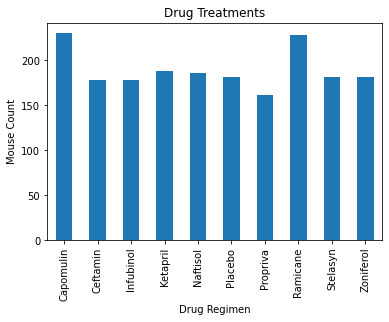

In [97]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_data_points = combined_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
drug_data_points.plot(kind="bar")

plt.title("Drug Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

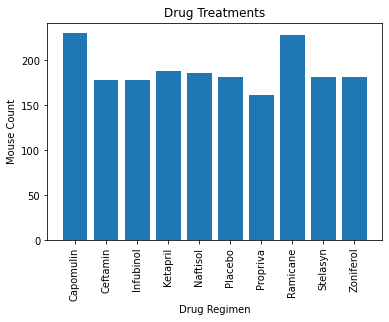

In [99]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug_list = summary_df.index.tolist()
drug_list

drug_count = (combined_data_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

x_axis = np.arange(len(drug_count))
x_axis = drug_list


plt.bar(x_axis, drug_count, align="center")

plt.title("Drug Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
plt.xticks(rotation='vertical')


Text(0, 0.5, '')

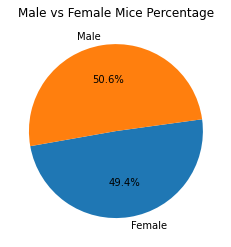

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(combined_data_df.groupby(["Sex"]).count()).reset_index()
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

gender_df.plot(kind="pie", y = "Mouse ID", autopct='%1.1f%%',
              startangle=190, labels=gender_df["Sex"], legend = False)

plt.title("Male vs Female Mice Percentage")
plt.ylabel("")

Text(0.5, 1.0, 'Male vs Female Mice Percentage')

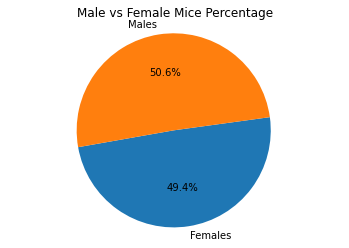

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = (combined_data_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count
labels = ["Females", "Males"]
plt.pie(gender_count, labels=labels, autopct="%1.1f%%", startangle=190)
plt.axis("equal")
plt.title("Male vs Female Mice Percentage")

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_tumor = combined_data_df[combined_data_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
final_time = final_tumor.sort_values(["Timepoint"], ascending=True)
final_time

final_time_vol = final_time.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
final_time_vol
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_merge_df = combined_data_df.merge(final_time_vol, on="Mouse ID", how="left", sort="False")
final_merge_df.head()





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Tumor Volume (mm3)_y
0,a203,Infubinol,Female,20,23,0,45.000000,0,67.973419
1,a203,Infubinol,Female,20,23,5,48.508468,0,67.973419
2,a203,Infubinol,Female,20,23,10,51.852437,1,67.973419
3,a203,Infubinol,Female,20,23,15,52.777870,1,67.973419
4,a203,Infubinol,Female,20,23,20,55.173336,1,67.973419


In [63]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

final_df = final_merge_df.reset_index()
tumor_list = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)_y'].apply(list)
tumor_list_df = pd.DataFrame(tumor_list)
tumor_list_df = tumor_list_df.reindex(treatments)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)_y']]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumor_capo = final_df[final_df["Drug Regimen"].isin(["Capomulin"])]
tumor_capo.head().reset_index() 

capo_tumor = tumor_capo.sort_values(["Tumor Volume (mm3)_y"], ascending=True).reset_index()
capo_tumor = capo_tumor["Tumor Volume (mm3)_y"]
capo_tumor

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

0      23.343598
1      23.343598
2      23.343598
3      23.343598
4      23.343598
         ...    
225    47.685963
226    47.685963
227    47.685963
228    47.685963
229    47.685963
Name: Tumor Volume (mm3)_y, Length: 230, dtype: float64

In [65]:
quartiles = capo_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Capomulin final tumor volume is: {lowerq}")
print(f"The upper quartile of Capomulin final tumor volume is: {upperq}")
print(f"The interquartile range of Capomulin final tumor volume is: {iqr}")
print(f"The median of Capomulin final tumor volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin final tumor volume is: 32.37735684
The upper quartile of Capomulin final tumor volume is: 40.1592203
The interquartile range of Capomulin final tumor volume is: 7.781863460000004
The median of Capomulin final tumor volume is: 37.718505085000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [67]:
tumor_ram = final_df[final_df["Drug Regimen"].isin(["Ramicane"])]
tumor_ram.head().reset_index() 

ram_tumor = tumor_ram.sort_values(["Tumor Volume (mm3)_y"], ascending=True).reset_index()
ram_tumor = ram_tumor["Tumor Volume (mm3)_y"]


quartiles = ram_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Ramicane final tumor volume is: {lowerq}")
print(f"The upper quartile of Ramicane final tumor volume is: {upperq}")
print(f"The interquartile range of Ramicane final tumor volume is: {iqr}")
print(f"The median of Ramicane final tumor volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")







The lower quartile of Ramicane final tumor volume is: 31.09533505
The upper quartile of Ramicane final tumor volume is: 38.81036633
The interquartile range of Ramicane final tumor volume is: 7.715031280000002
The median of Ramicane final tumor volume is: 36.37451039
Values below 19.522788129999995 could be outliers.
Values above 50.38291325 could be outliers.


In [69]:
tumor_inf = final_df[final_df["Drug Regimen"].isin(["Infubinol"])]
tumor_inf.head().reset_index() 

inf_tumor = tumor_inf.sort_values(["Tumor Volume (mm3)_y"], ascending=True).reset_index()
inf_tumor = inf_tumor["Tumor Volume (mm3)_y"]


quartiles = inf_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Infubinol final tumor volume is: {lowerq}")
print(f"The upper quartile of Infubinol final tumor volume is: {upperq}")
print(f"The interquartile range of Infubinol final tumor volume is: {iqr}")
print(f"The median of Infubinol final tumor volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol final tumor volume is: 57.03186187
The upper quartile of Infubinol final tumor volume is: 66.19691151
The interquartile range of Infubinol final tumor volume is: 9.165049640000007
The median of Infubinol final tumor volume is: 62.276341445
Values below 43.28428740999999 could be outliers.
Values above 79.94448597000002 could be outliers.


In [70]:
tumor_cef = final_df[final_df["Drug Regimen"].isin(["Ceftamin"])]
tumor_cef.head().reset_index() 

cef_tumor = tumor_cef.sort_values(["Tumor Volume (mm3)_y"], ascending=True).reset_index()
cef_tumor = cef_tumor["Tumor Volume (mm3)_y"]


quartiles = cef_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Ceftamin final tumor volume is: {lowerq}")
print(f"The upper quartile of Ceftamin final tumor volume is: {upperq}")
print(f"The interquartile range of Ceftamin final tumor volume is: {iqr}")
print(f"The median of Ceftamin final tumor volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin final tumor volume is: 59.74190064
The upper quartile of Ceftamin final tumor volume is: 64.72983655
The interquartile range of Ceftamin final tumor volume is: 4.9879359100000045
The median of Ceftamin final tumor volume is: 62.424189775
Values below 52.25999677499999 could be outliers.
Values above 72.21174041500001 could be outliers.


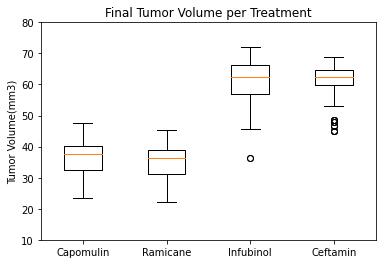

In [84]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vols, labels=treatments)
plt.ylim(10, 80)

plt.title("Final Tumor Volume per Treatment")
plt.ylabel("Tumor Volume(mm3)")
plt.show()





## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

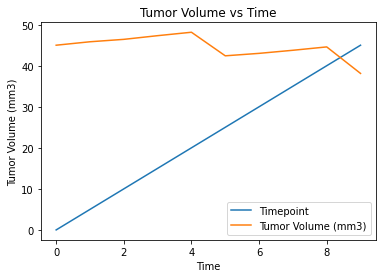

In [85]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
time_vs_tumor = combined_data_df[combined_data_df["Mouse ID"].isin(["j119"])]
time_vs_tumor

time_vs_tumor_data = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumor_data

line_plot_df = time_vs_tumor_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()
plt.title("Tumor Volume vs Time")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")

Text(0.5, 1.0, 'Average Tumor Volume vs Mouse Weight on Capomulin Treatment')

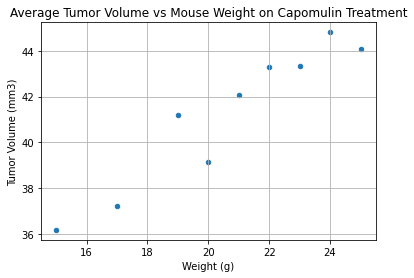

In [73]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


capomulin_scatter = combined_data_df[combined_data_df["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = combined_data_df[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_scatter_plot = capomulin_scatter.reset_index()

capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)


capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capomulin_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

capomulin_scatter = capomulin_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, )

plt.title("Average Tumor Volume vs Mouse Weight on Capomulin Treatment")

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = capomulin_plot['Weight (g)']
tumor = capomulin_plot['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor)
round(correlation[0],2)

0.95

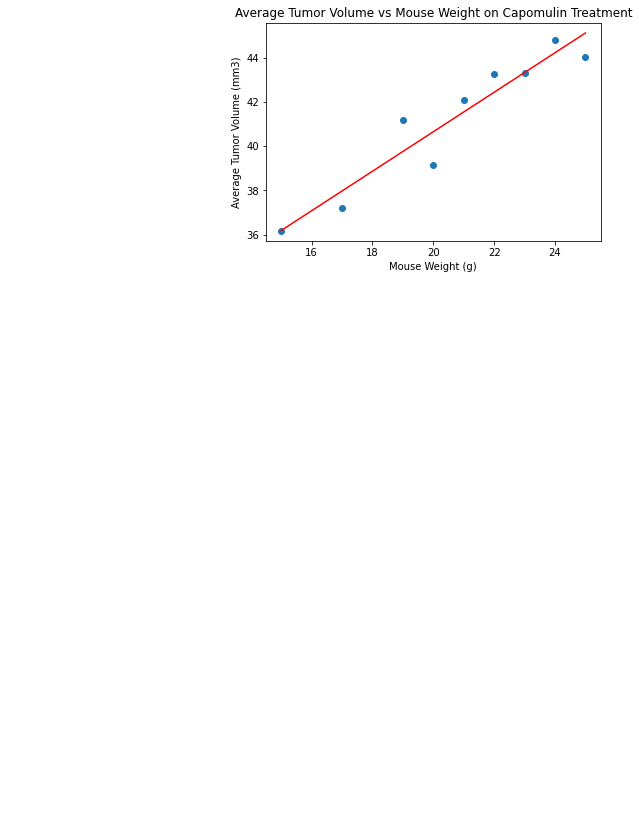

In [81]:
from scipy.stats import linregress

x_values = capomulin_plot['Weight (g)']
y_values = capomulin_plot['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Average Tumor Volume vs Mouse Weight on Capomulin Treatment")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [33]:
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.9034966277438599
